# Andrew's monotone chain convex hull algorithm

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def cross_product(o, a, b):
    """
    Comput the cross product of  position of B compared to OA.
    Returns True if OA and OB form a positive angle
    
    Parameters 
    ----------
    o : pd.Series
        Coordinates ('x', 'y') of point in hull
    a : pd.Series
        Coordinates('x', 'y') of current end_point
    b : pd.Pandas
        Tuple ('x', 'y') of considered point
    """
    return (a[0] - o[0]) * (b[1] - o[1]) - (a[1] - o[1]) * (b[0] - o[0])

In [3]:
def monotone_chain(points):
    assert len(points) >= 3
    points = points.sort_values(by=['x', 'y']) # sorting points by x and y values
    
    # computing lower hull
    lower_hull = []
    for p in points.itertuples(index=False):
        while len(lower_hull) >= 2 and cross_product(lower_hull[-2], lower_hull[-1], p) <= 0:
            lower_hull.pop()        
        lower_hull.append(list(p))
    lower_hull = pd.DataFrame(lower_hull, columns=points.columns)
    
    # computing upper hull
    upper_hull = []
    for p in points[::-1].itertuples(index=False):
        while len(upper_hull) >= 2 and cross_product(upper_hull[-2], upper_hull[-1], p) <= 0:
            upper_hull.pop()        
        upper_hull.append(list(p))
    upper_hull = pd.DataFrame(upper_hull, columns=points.columns)
    
    # assembling convex hull
    convex_hull = pd.concat([lower_hull, upper_hull]).drop_duplicates()

    # scatterplot of dataset and convex hull
    plt.figure(figsize=(10,6))
    plt.plot(upper_hull.x, upper_hull.y, color='firebrick', label='Upper hull')
    plt.plot(lower_hull.x, lower_hull.y, color='steelblue', label='Lower hull')
    plt.scatter(data=points, x='x', y='y', color='white', linewidth=1, edgecolors='black', label='Inner points')
    plt.scatter(data=convex_hull, x='x', y='y', s=50, color='black', label='Convex hull')
    plt.legend()
    plt.show()

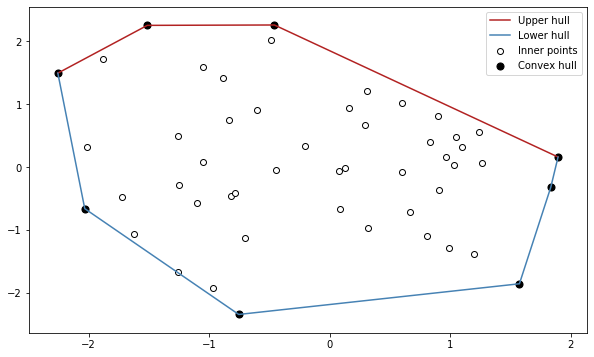

In [4]:
points = pd.DataFrame(np.random.normal(size=(50, 2)), columns=['x', 'y'])
monotone_chain(points)